In [372]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image as im
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets._samples_generator import make_blobs

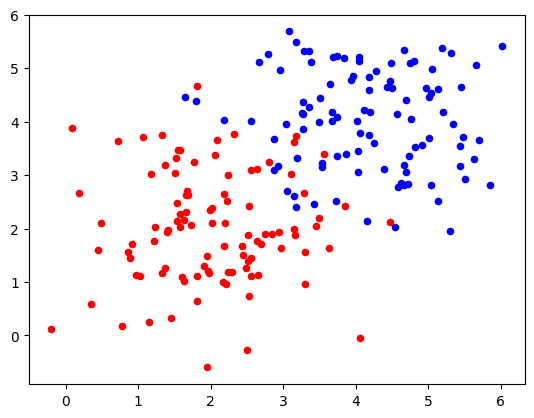

In [373]:
# Generate random data points
np.random.seed(52)
num_points = 100
class_0_points = np.random.normal(loc=[2, 2], scale=[1, 1], size=(num_points, 2))
class_1_points = np.random.normal(loc=[4, 4], scale=[1, 1], size=(num_points, 2))

# Function to classify the points
def classify_points(point):
    # Assuming a simple linear classification based on the x-coordinate
    if point[0] < 3:
        return 0
    else:
        return 1

# Classify the data points
classified_points = np.zeros(2 * num_points)
for i in range(num_points):
    classified_points[i] = classify_points(class_0_points[i])
    classified_points[i + num_points] = classify_points(class_1_points[i])



x = np.vstack((class_0_points, class_1_points))
y = classified_points

plt.scatter(class_0_points[:, 0], class_0_points[:, 1], s=20 , c='red', label='Class 0')
plt.scatter(class_1_points[:, 0], class_1_points[:, 1],s=20 , c='blue', label='Class 1')
plt.show()


In [374]:
# x, y = make_blobs(n_samples=100, centers=2, random_state=1) #centers = anva , n_samples = tedad nemune
# plt.scatter(x[:, 0], x[:, 1], c=y, s=30, cmap=plt.cm.Paired)
# plt.show()

In [375]:
svm = SVC(kernel='linear' , C=10)
svm.fit(x, y)
# Create meshgrid for decision boundary visualization
h = 0.02  # Step size in the mesh
x_min = np.min(x[:,0])
x_max = np.max(x[:,0])
y_min = np.min(x[:,1])
y_max = np.max(x[:,1]) 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Make predictions on meshgrid points
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


In [376]:
# # Create scatter plot
# plt.figure()
# plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
# plt.scatter(class_0_points[:, 0], class_0_points[:, 1], s=20 , c='blue', label='Class 0')
# plt.scatter(class_1_points[:, 0], class_1_points[:, 1],s=20 , c='red', label='Class 1')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('SVM Classification')
# plt.legend()
# plt.show()

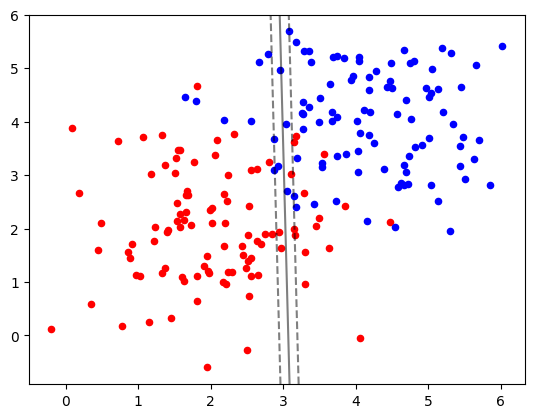

In [377]:

plt.scatter(class_0_points[:, 0], class_0_points[:, 1], s=20 , c='red', label='Class 0')
plt.scatter(class_1_points[:, 0], class_1_points[:, 1],s=20 , c='blue', label='Class 1')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels = [-1,0,1], alpha=0.5
           , linestyles=['--', '-', '--'])

ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
            s = 100, linewidth=1, facecolors='none')
plt.show()